## What is All Time Low's Most Danceable Album Out of the First Two Albums? 

In [50]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests

### Importing all the software needed for the notebook

In [51]:
keys = pd.read_csv("Spotify-Keys.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

### Importing all the Spotify information from other notebooks without directly listing the passwords and keys. 

## All Time Low's First Album Put Up or Shut Up. 

### Album 1: Put Up Or Shut Up

In [52]:
PutUp_id = '47boQgN4dboq2f0IcvI4Bt'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(PutUp_id)
PutUp_tracks = requests.get(album_tracks_endpoint, headers = session_header)
PutUp_dict = json.loads(PutUp_tracks.text)
PutUp_track_ids = [x['id'] for x in PutUp_dict['items']]
PutUp_track_ids
PutUp_track_strings = ','.join(str(x) for x in PutUp_track_ids)
PutUp_track_strings
track_features_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(PutUp_track_strings)
audio_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(PutUp_track_strings)
PutUp_audio_features = requests.get(audio_features_endpoint, headers = session_header)
PutUp_track_features = requests.get(track_features_endpoint, headers = session_header)
PutUp_audio_dict = json.loads(PutUp_audio_features.text)
PutUp_track_dict = json.loads(PutUp_track_features.text)

#### Accessing all of the tracks, endpoints and audio features to start making a dataframe.

In [53]:
PutUp_track_df = pd.DataFrame(PutUp_track_dict['tracks'])

#### Making Put Up track dictionary of tracks into a dataframe called PutUp_track_df

In [54]:
PutUp_audio_df = pd.DataFrame(PutUp_audio_dict['audio_features'])

#### Making Put Up audio dictionary of the audio features into a dataframe called PutUp_audio_df

In [55]:
PutUp_audio_df['album'] = ['PutUp'] * len(PutUp_audio_df.index)

#### Making the PutUp audio dataframe into a dataframe with the column of the name 'album' to display the album name

In [56]:
PutUp_df = PutUp_track_df.merge(PutUp_audio_df, on = 'id', how ='left')

#### Merging the two dataframes: the track dataframe and the audio dataframe to create one big dataframe. 

In [57]:
PutUp_df

,album_x,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature,album_y
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,181026,False,{'isrc': 'USHR20647002'},{'spotify': 'https://open.spotify.com/track/3j...,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,3j1HTRodSjGtK3YsYMI0XF,...,0.0963,0.431,185.021,audio_features,spotify:track:3j1HTRodSjGtK3YsYMI0XF,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,https://api.spotify.com/v1/audio-analysis/3j1H...,181027,4,PutUp
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,183573,False,{'isrc': 'USHR20647001'},{'spotify': 'https://open.spotify.com/track/6b...,https://api.spotify.com/v1/tracks/6b23XfrLswil...,6b23XfrLswilUCsHQHPY1i,...,0.2980,0.491,179.769,audio_features,spotify:track:6b23XfrLswilUCsHQHPY1i,https://api.spotify.com/v1/tracks/6b23XfrLswil...,https://api.spotify.com/v1/audio-analysis/6b23...,183573,4,PutUp
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,218200,False,{'isrc': 'USHR20647003'},{'spotify': 'https://open.spotify.com/track/5Z...,https://api.spotify.com/v1/tracks/5ZEQLXv9F2pK...,5ZEQLXv9F2pKtQrGwMKpMB,...,0.1140,0.115,172.679,audio_features,spotify:track:5ZEQLXv9F2pKtQrGwMKpMB,https://api.spotify.com/v1/tracks/5ZEQLXv9F2pK...,https://api.spotify.com/v1/audio-analysis/5ZEQ...,218200,4,PutUp
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,218293,False,{'isrc': 'USHR20647004'},{'spotify': 'https://open.spotify.com/track/1o...,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,1oTtOTbcP8waTv4wPsCqSm,...,0.0828,0.353,96.030,audio_features,spotify:track:1oTtOTbcP8waTv4wPsCqSm,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,https://api.spotify.com/v1/audio-analysis/1oTt...,218293,4,PutUp
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,177840,False,{'isrc': 'USHR20647005'},{'spotify': 'https://open.spotify.com/track/6f...,https://api.spotify.com/v1/tracks/6f7h261u7CPB...,6f7h261u7CPBNFRBYL5Boq,...,0.3250,0.408,174.953,audio_features,spotify:track:6f7h261u7CPBNFRBYL5Boq,https://api.spotify.com/v1/tracks/6f7h261u7CPB...,https://api.spotify.com/v1/audio-analysis/6f7h...,177840,4,PutUp
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,180693,False,{'isrc': 'USHR20647006'},{'spotify': 'https://open.spotify.com/track/6P...,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,6PTr9xi7S1eZskFIjPNY8e,...,0.3010,0.520,176.944,audio_features,spotify:track:6PTr9xi7S1eZskFIjPNY8e,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,https://api.spotify.com/v1/audio-analysis/6PTr...,180693,4,PutUp
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242973,False,{'isrc': 'USHR20647007'},{'spotify': 'https://open.spotify.com/track/0S...,https://api.spotify.com/v1/tracks/0SQheC3TXkqJ...,0SQheC3TXkqJY6zZbWMv9v,...,0.1070,0.132,104.335,audio_features,spotify:track:0SQheC3TXkqJY6zZbWMv9v,https://api.spotify.com/v1/tracks/0SQheC3TXkqJ...,https://api.spotify.com/v1/audio-analysis/0SQh...,242973,3,PutUp


#### Calling the dataframe to display the table. The "..." means that there are many other columns within the dataframe. 

In [58]:
PutUp_df.keys()

Index(['album_x', 'artists', 'available_markets', 'disc_number',
       'duration_ms_x', 'explicit', 'external_ids', 'external_urls', 'href',
       'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number',
       'type_x', 'uri_x', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type_y', 'uri_y', 'track_href', 'analysis_url',
       'duration_ms_y', 'time_signature', 'album_y'],
      dtype='object')

#### Calling the dataframe keys to see what the columns are included in the "..."

## All Time Low's Second Album So Wrong It's Right

## Album 2: So Wrong It's Right

In [59]:
SoWrongItsRight_id = '0H4ELcHequ3OligrjWfrZP'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(SoWrongItsRight_id)
SoWrongItsRight_tracks = requests.get(album_tracks_endpoint, headers = session_header)
SoWrongItsRight_dict = json.loads(SoWrongItsRight_tracks.text)
SoWrongItsRight_track_ids = [x['id'] for x in SoWrongItsRight_dict['items']]
SoWrongItsRight_track_ids
SoWrongItsRight_track_strings = ','.join(str(x) for x in SoWrongItsRight_track_ids)
SoWrongItsRight_track_strings
track_features_endpoint = "https://api.spotify.com/v1/tracks?ids={}".format(SoWrongItsRight_track_strings)
audio_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(SoWrongItsRight_track_strings)
SoWrongItsRight_audio_features = requests.get(audio_features_endpoint, headers = session_header)
SoWrongItsRight_track_features = requests.get(track_features_endpoint, headers = session_header)
SoWrongItsRight_audio_dict = json.loads(SoWrongItsRight_audio_features.text)
SoWrongItsRight_track_dict = json.loads(SoWrongItsRight_track_features.text)

#### Accessing all of the tracks, endpoints and audio features to start making a dataframe.

In [60]:
SoWrongItsRight_track_df = pd.DataFrame(SoWrongItsRight_track_dict['tracks'])

#### Making SoWrongItsRight track dictionary of tracks into a dataframe called SoWrongItsRight_track_df

In [61]:
SoWrongItsRight_audio_df = pd.DataFrame(SoWrongItsRight_audio_dict['audio_features'])

#### Making SoWrongItsRight audio dictionary of the audio features into a dataframe called SoWrongItsRight_audio_df

In [62]:
SoWrongItsRight_audio_df['album'] = ['SoWrongItsRight'] * len(SoWrongItsRight_audio_df.index)

#### Making the SoWrongItsRight audio dataframe into a dataframe with the column of the name 'album' to display the album name

In [63]:
SoWrongItsRight_df = SoWrongItsRight_track_df.merge(SoWrongItsRight_audio_df, on = 'id', how ='left')

#### Merging the two dataframes: the track dataframe and the audio dataframe to create one big dataframe. 

In [64]:
SoWrongItsRight_df

,album_x,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature,album_y
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,149613,False,{'isrc': 'USHR20747012'},{'spotify': 'https://open.spotify.com/track/2r...,https://api.spotify.com/v1/tracks/2rQSAtxX1yuo...,2rQSAtxX1yuoWq8ZrvUhpL,...,0.3480,0.644,198.898,audio_features,spotify:track:2rQSAtxX1yuoWq8ZrvUhpL,https://api.spotify.com/v1/tracks/2rQSAtxX1yuo...,https://api.spotify.com/v1/audio-analysis/2rQS...,149613,4,SoWrongItsRight
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,180440,False,{'isrc': 'USHR20747013'},{'spotify': 'https://open.spotify.com/track/4N...,https://api.spotify.com/v1/tracks/4NpzB4z4B0Uc...,4NpzB4z4B0UcajopWE5e6h,...,0.0355,0.592,182.963,audio_features,spotify:track:4NpzB4z4B0UcajopWE5e6h,https://api.spotify.com/v1/tracks/4NpzB4z4B0Uc...,https://api.spotify.com/v1/audio-analysis/4Npz...,180440,4,SoWrongItsRight
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,216546,False,{'isrc': 'USHR20747014'},{'spotify': 'https://open.spotify.com/track/3M...,https://api.spotify.com/v1/tracks/3MfRql0HwuxE...,3MfRql0HwuxEZzGpoIC832,...,0.1090,0.341,130.928,audio_features,spotify:track:3MfRql0HwuxEZzGpoIC832,https://api.spotify.com/v1/tracks/3MfRql0HwuxE...,https://api.spotify.com/v1/audio-analysis/3MfR...,216547,4,SoWrongItsRight
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,231973,False,{'isrc': 'USHR20747015'},{'spotify': 'https://open.spotify.com/track/62...,https://api.spotify.com/v1/tracks/62wWvHpBOmbG...,62wWvHpBOmbGbzkls0Iomo,...,0.0896,0.482,179.891,audio_features,spotify:track:62wWvHpBOmbGbzkls0Iomo,https://api.spotify.com/v1/tracks/62wWvHpBOmbG...,https://api.spotify.com/v1/audio-analysis/62wW...,231973,4,SoWrongItsRight
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,181720,False,{'isrc': 'USHR20747016'},{'spotify': 'https://open.spotify.com/track/3x...,https://api.spotify.com/v1/tracks/3xOE5ciDmfQ0...,3xOE5ciDmfQ0VY3WahE0eJ,...,0.1280,0.639,167.012,audio_features,spotify:track:3xOE5ciDmfQ0VY3WahE0eJ,https://api.spotify.com/v1/tracks/3xOE5ciDmfQ0...,https://api.spotify.com/v1/audio-analysis/3xOE...,181720,4,SoWrongItsRight
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,182826,False,{'isrc': 'USHR20747017'},{'spotify': 'https://open.spotify.com/track/0J...,https://api.spotify.com/v1/tracks/0JJP0IS4w0fJ...,0JJP0IS4w0fJx01EcrfkDe,...,0.2060,0.572,181.040,audio_features,spotify:track:0JJP0IS4w0fJx01EcrfkDe,https://api.spotify.com/v1/tracks/0JJP0IS4w0fJ...,https://api.spotify.com/v1/audio-analysis/0JJP...,182827,4,SoWrongItsRight
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,221733,False,{'isrc': 'USHR20747018'},{'spotify': 'https://open.spotify.com/track/5p...,https://api.spotify.com/v1/tracks/5pWqD58cZ9TN...,5pWqD58cZ9TNvL9WbNfcQ3,...,0.0852,0.587,182.996,audio_features,spotify:track:5pWqD58cZ9TNvL9WbNfcQ3,https://api.spotify.com/v1/tracks/5pWqD58cZ9TN...,https://api.spotify.com/v1/audio-analysis/5pWq...,221733,4,SoWrongItsRight
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, B

#### Calling the dataframe to display the table. The "..." means that there are many other columns within the dataframe. 

In [65]:
audio_features = pd.concat([PutUp_df, SoWrongItsRight_df])

### Collecting the two data frames of the audio features for the albums.

In [66]:
audio_features

,album_x,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature,album_y
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,181026,False,{'isrc': 'USHR20647002'},{'spotify': 'https://open.spotify.com/track/3j...,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,3j1HTRodSjGtK3YsYMI0XF,...,0.0963,0.431,185.021,audio_features,spotify:track:3j1HTRodSjGtK3YsYMI0XF,https://api.spotify.com/v1/tracks/3j1HTRodSjGt...,https://api.spotify.com/v1/audio-analysis/3j1H...,181027,4,PutUp
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,183573,False,{'isrc': 'USHR20647001'},{'spotify': 'https://open.spotify.com/track/6b...,https://api.spotify.com/v1/tracks/6b23XfrLswil...,6b23XfrLswilUCsHQHPY1i,...,0.2980,0.491,179.769,audio_features,spotify:track:6b23XfrLswilUCsHQHPY1i,https://api.spotify.com/v1/tracks/6b23XfrLswil...,https://api.spotify.com/v1/audio-analysis/6b23...,183573,4,PutUp
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,218200,False,{'isrc': 'USHR20647003'},{'spotify': 'https://open.spotify.com/track/5Z...,https://api.spotify.com/v1/tracks/5ZEQLXv9F2pK...,5ZEQLXv9F2pKtQrGwMKpMB,...,0.1140,0.115,172.679,audio_features,spotify:track:5ZEQLXv9F2pKtQrGwMKpMB,https://api.spotify.com/v1/tracks/5ZEQLXv9F2pK...,https://api.spotify.com/v1/audio-analysis/5ZEQ...,218200,4,PutUp
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,218293,False,{'isrc': 'USHR20647004'},{'spotify': 'https://open.spotify.com/track/1o...,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,1oTtOTbcP8waTv4wPsCqSm,...,0.0828,0.353,96.030,audio_features,spotify:track:1oTtOTbcP8waTv4wPsCqSm,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,https://api.spotify.com/v1/audio-analysis/1oTt...,218293,4,PutUp
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,177840,False,{'isrc': 'USHR20647005'},{'spotify': 'https://open.spotify.com/track/6f...,https://api.spotify.com/v1/tracks/6f7h261u7CPB...,6f7h261u7CPBNFRBYL5Boq,...,0.3250,0.408,174.953,audio_features,spotify:track:6f7h261u7CPBNFRBYL5Boq,https://api.spotify.com/v1/tracks/6f7h261u7CPB...,https://api.spotify.com/v1/audio-analysis/6f7h...,177840,4,PutUp
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,180693,False,{'isrc': 'USHR20647006'},{'spotify': 'https://open.spotify.com/track/6P...,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,6PTr9xi7S1eZskFIjPNY8e,...,0.3010,0.520,176.944,audio_features,spotify:track:6PTr9xi7S1eZskFIjPNY8e,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,https://api.spotify.com/v1/audio-analysis/6PTr...,180693,4,PutUp
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,242973,False,{'isrc': 'USHR20647007'},{'spotify': 'https://open.spotify.com/track/0S...,https://api.spotify.com/v1/tracks/0SQheC3TXkqJ...,0SQheC3TXkqJY6zZbWMv9v,...,0.1070,0.132,104.335,audio_features,spotify:track:0SQheC3TXkqJY6zZbWMv9v,https://api.spotify.com/v1/tracks/0SQheC3TXkqJ...,https://api.spotify.com/v1/audio-analysis/0SQh...,242973,3,PutUp
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,149613,False,{'isrc': 'USHR20747012'},{'spotify': 'https://o

#### Calling audio features to display.

In [67]:
af = pd.read_csv('audio_features.csv', sep = ',')

#### Assigning af to be the audio features data frame csv file.

In [68]:
audio_features.sort_values('danceability', ascending = False).head(10)

,album_x,artists,available_markets,disc_number,duration_ms_x,explicit,external_ids,external_urls,href,id,...,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature,album_y
11,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,199986,False,{'isrc': 'USHR20747023'},{'spotify': 'https://open.spotify.com/track/3a...,https://api.spotify.com/v1/tracks/3aCRrvADMjFj...,3aCRrvADMjFjZq1x8dWD0t,...,0.3890,0.521,123.013,audio_features,spotify:track:3aCRrvADMjFjZq1x8dWD0t,https://api.spotify.com/v1/tracks/3aCRrvADMjFj...,https://api.spotify.com/v1/audio-analysis/3aCR...,199987,4,SoWrongItsRight
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,216546,False,{'isrc': 'USHR20747014'},{'spotify': 'https://open.spotify.com/track/3M...,https://api.spotify.com/v1/tracks/3MfRql0HwuxE...,3MfRql0HwuxEZzGpoIC832,...,0.1090,0.341,130.928,audio_features,spotify:track:3MfRql0HwuxEZzGpoIC832,https://api.spotify.com/v1/tracks/3MfRql0HwuxE...,https://api.spotify.com/v1/audio-analysis/3MfR...,216547,4,SoWrongItsRight
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,218293,False,{'isrc': 'USHR20647004'},{'spotify': 'https://open.spotify.com/track/1o...,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,1oTtOTbcP8waTv4wPsCqSm,...,0.0828,0.353,96.030,audio_features,spotify:track:1oTtOTbcP8waTv4wPsCqSm,https://api.spotify.com/v1/tracks/1oTtOTbcP8wa...,https://api.spotify.com/v1/audio-analysis/1oTt...,218293,4,PutUp
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,182826,False,{'isrc': 'USHR20747017'},{'spotify': 'https://open.spotify.com/track/0J...,https://api.spotify.com/v1/tracks/0JJP0IS4w0fJ...,0JJP0IS4w0fJx01EcrfkDe,...,0.2060,0.572,181.040,audio_features,spotify:track:0JJP0IS4w0fJx01EcrfkDe,https://api.spotify.com/v1/tracks/0JJP0IS4w0fJ...,https://api.spotify.com/v1/audio-analysis/0JJP...,182827,4,SoWrongItsRight
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,180693,False,{'isrc': 'USHR20647006'},{'spotify': 'https://open.spotify.com/track/6P...,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,6PTr9xi7S1eZskFIjPNY8e,...,0.3010,0.520,176.944,audio_features,spotify:track:6PTr9xi7S1eZskFIjPNY8e,https://api.spotify.com/v1/tracks/6PTr9xi7S1eZ...,https://api.spotify.com/v1/audio-analysis/6PTr...,180693,4,PutUp
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,169680,False,{'isrc': 'USHR20747020'},{'spotify': 'https://open.spotify.com/track/64...,https://api.spotify.com/v1/tracks/64WvIOjnquE5...,64WvIOjnquE5dasQ7Kb7Bs,...,0.2150,0.528,175.054,audio_features,spotify:track:64WvIOjnquE5dasQ7Kb7Bs,https://api.spotify.com/v1/tracks/64WvIOjnquE5...,https://api.spotify.com/v1/audio-analysis/64Wv...,169680,4,SoWrongItsRight
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,256733,False,{'isrc': 'USHR20747019'},{'spotify': 'https://open.spotify.com/track/2q...,https://api.spotify.com/v1/tracks/2qxXypNXOJZ5...,2qxXypNXOJZ5qUFdpzJ56n,...,0.1410,0.316,170.043,audio_features,spotify:track:2qxXypNXOJZ5qUFdpzJ56n,https://api.spotify.com/v1/tracks/2qxXypNXOJZ5...,https://api.spotify.com/v1/audio-analysis/2qxX...,256733,3,SoWrongItsRight
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,181026,Fa

#### Sorting the top 10 songs with the highest danceability.

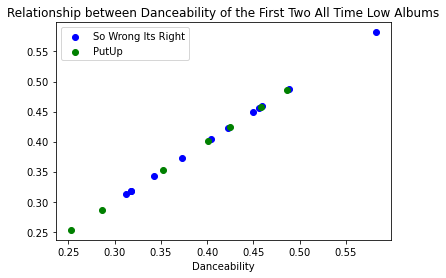

In [69]:
fig1, ax1 =plt.subplots()
putup_df = af[af['album'] == 'PutUp']
sowrong_df = af[af['album']== 'SoWrongItsRight']
ax1.scatter(sowrong_df['danceability'], sowrong_df['danceability'], label ='So Wrong Its Right', color = 'blue')
ax1.scatter(putup_df['danceability'], putup_df['danceability'], label = 'PutUp' , color = 'green')
ax1.set_xlabel('Danceability')
ax1.set_title('Relationship between Danceability of the First Two All Time Low Albums')
ax1.legend()
plt.show()

#### Plotting the danceability comparison between the two albums in the scatter plot above.

#### So Wrong Its Right is the most danceable album compared to Put Up or Shut Up. Put Up or Shut Up's danceability is very linear as is So Wrong Its Right. 

 Looking back now, I am not sure if it is fair to compare the danceability of these two albums. Put Up or Shut Up only has 7 tracks when So Wrong It's Right has 12 tracks. Since So Wrong It's Right has more tracks, the danceability might be affected. 

The most danceable song out of all of these songs is called "Poppin' Champagne"

I calculated this by noticing that the first track of all the albums starts at 0. The first track labeled 0 is actually track 1. With that being said track 11 in the dataframe is actually track 12. Track 12 is the last track of the album. I looked up the track order on Spotify and the last track listed is "Poppin' Champagne."

#### I would like to further explore whether or not the number of tracks in an album influences the score of danceability of the album. I will do this by comparing all the albums and their track danceability, making a scatterplot that reflects this. By doing so, I will compare the highest danceability tracks with the number of tracks given in the album. 